In [14]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from sklearn.linear_model import LogisticRegression
import pymc3 as pm

## The Dataset

You can download the dataset from here: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [15]:
## 1 point

## ToDo: read the csv file into a dataframe and show the first 5 rows
diab_df = pd.read_csv('diabetes.csv')
diab_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
## 3 points

## Assign the Outcome variable to y and the rest to X.
X = diab_df.loc[:, diab_df.columns!='Outcome']
y = diab_df.loc[:, diab_df.columns=='Outcome']
## USe LogisticRegression to fit the data and print out the intercept and the coefficients
model = LogisticRegression().fit(X,y)

c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
print('The coefficients of model are:')
model.coef_

The coefficients of model are:


array([[ 1.17252330e-01,  3.35997354e-02, -1.40874043e-02,
        -1.27051450e-03, -1.24031553e-03,  7.72024560e-02,
         1.41904137e+00,  1.00354613e-02]])

In [18]:
print('The intercept of model:')
model.intercept_

The intercept of model:


array([-7.70290459])

In [19]:
## 2 points

## Explain what the code is doing:
#Answer : It is implementing a Bayesian Logistic Regression model.

## What are the prior probabilities of the intercept and coefficients?
#Answer : The prior probablities are normal distributions with mean as 0 and standard deviation as 100.

# Which likelihood distribution has been used?
#Answer : Bernoulli

## What does pm.invlogit(linreg) mean?
#Answer : Inverse-logit function, transforms continuous values to the range (0, 1), probabilities must be between 0 and 1 and maps from the linear predictor to the probabilities

## What is map_est?
#Answer :  It runs optimization which gives you exactly one parameter set, the maximum-a-posteriori estimate.
with pm.Model() as logreg_model:
  
    w0 = pm.Normal('w0', mu=0, sd=100)
    w1 = pm.Normal('w1', mu=0, sd=100)
    w2 = pm.Normal('w2', mu=0, sd=100)
    w3 = pm.Normal('w3', mu=0, sd=100)
    w4 = pm.Normal('w4', mu=0, sd=100)
    w5 = pm.Normal('w5', mu=0, sd=100)
    w6 = pm.Normal('w6', mu=0, sd=100)
    w7 = pm.Normal('w7', mu=0, sd=100)
    w8 = pm.Normal('w8', mu=0, sd=100)
   
    
    linreg = w0 * np.ones(diab_df.shape[0]) + w1 * diab_df.Pregnancies.values + w2 * diab_df.Glucose.values \
    + w3 * diab_df.BloodPressure.values + w4 * diab_df.SkinThickness.values + w5 * diab_df.Insulin.values + \
    w6 * diab_df.BMI.values + w7 * diab_df.DiabetesPedigreeFunction.values + w8 * diab_df.Age.values
    p_outcome = pm.invlogit(linreg)

    likelihood = pm.Bernoulli('likelihood', p_outcome, observed=diab_df.Outcome.values)

    
    map_est= pm.find_MAP()
    print(map_est)

c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)



{'w0': array(-8.4045709), 'w1': array(0.12318661), 'w2': array(0.03516364), 'w3': array(-0.01329265), 'w4': array(0.00062273), 'w5': array(-0.00119144), 'w6': array(0.08968148), 'w7': array(0.94509088), 'w8': array(0.01487648)}


In [30]:
## 2 points

with logreg_model:
## ToDo: draw 400 samples using pm.Metropolis() and assign to the variable trace
    trace = pm.sample(400,step=pm.Metropolis(),start = pm.find_MAP(model = logreg_model))
## Explain the output of the plot:
#Answer: It displays the distribution of 400 samples drawn from the logreg_model model using the Metropolis Hastings Algorithm.

az.plot_posterior(trace)

<ipython-input-30-2a8a21ca1013>:5: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400,step=pm.Metropolis(),start = pm.find_MAP(model = logreg_model))
Only 400 samples in chain.
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [w8]
>Metropolis: [w7]
>Metropolis: [w6]
>Metropolis: [w5]
>Metropolis: [w4]
>Metropolis: [w3]
>Metropolis: [w2]
>Metropolis: [w1]
>Metropolis: [w0]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 4205 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
c:\users\mihir\appdata\local\programs\python\python38\lib\site-packages\arviz\data\io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021D46E41670>,
      dtype=object)

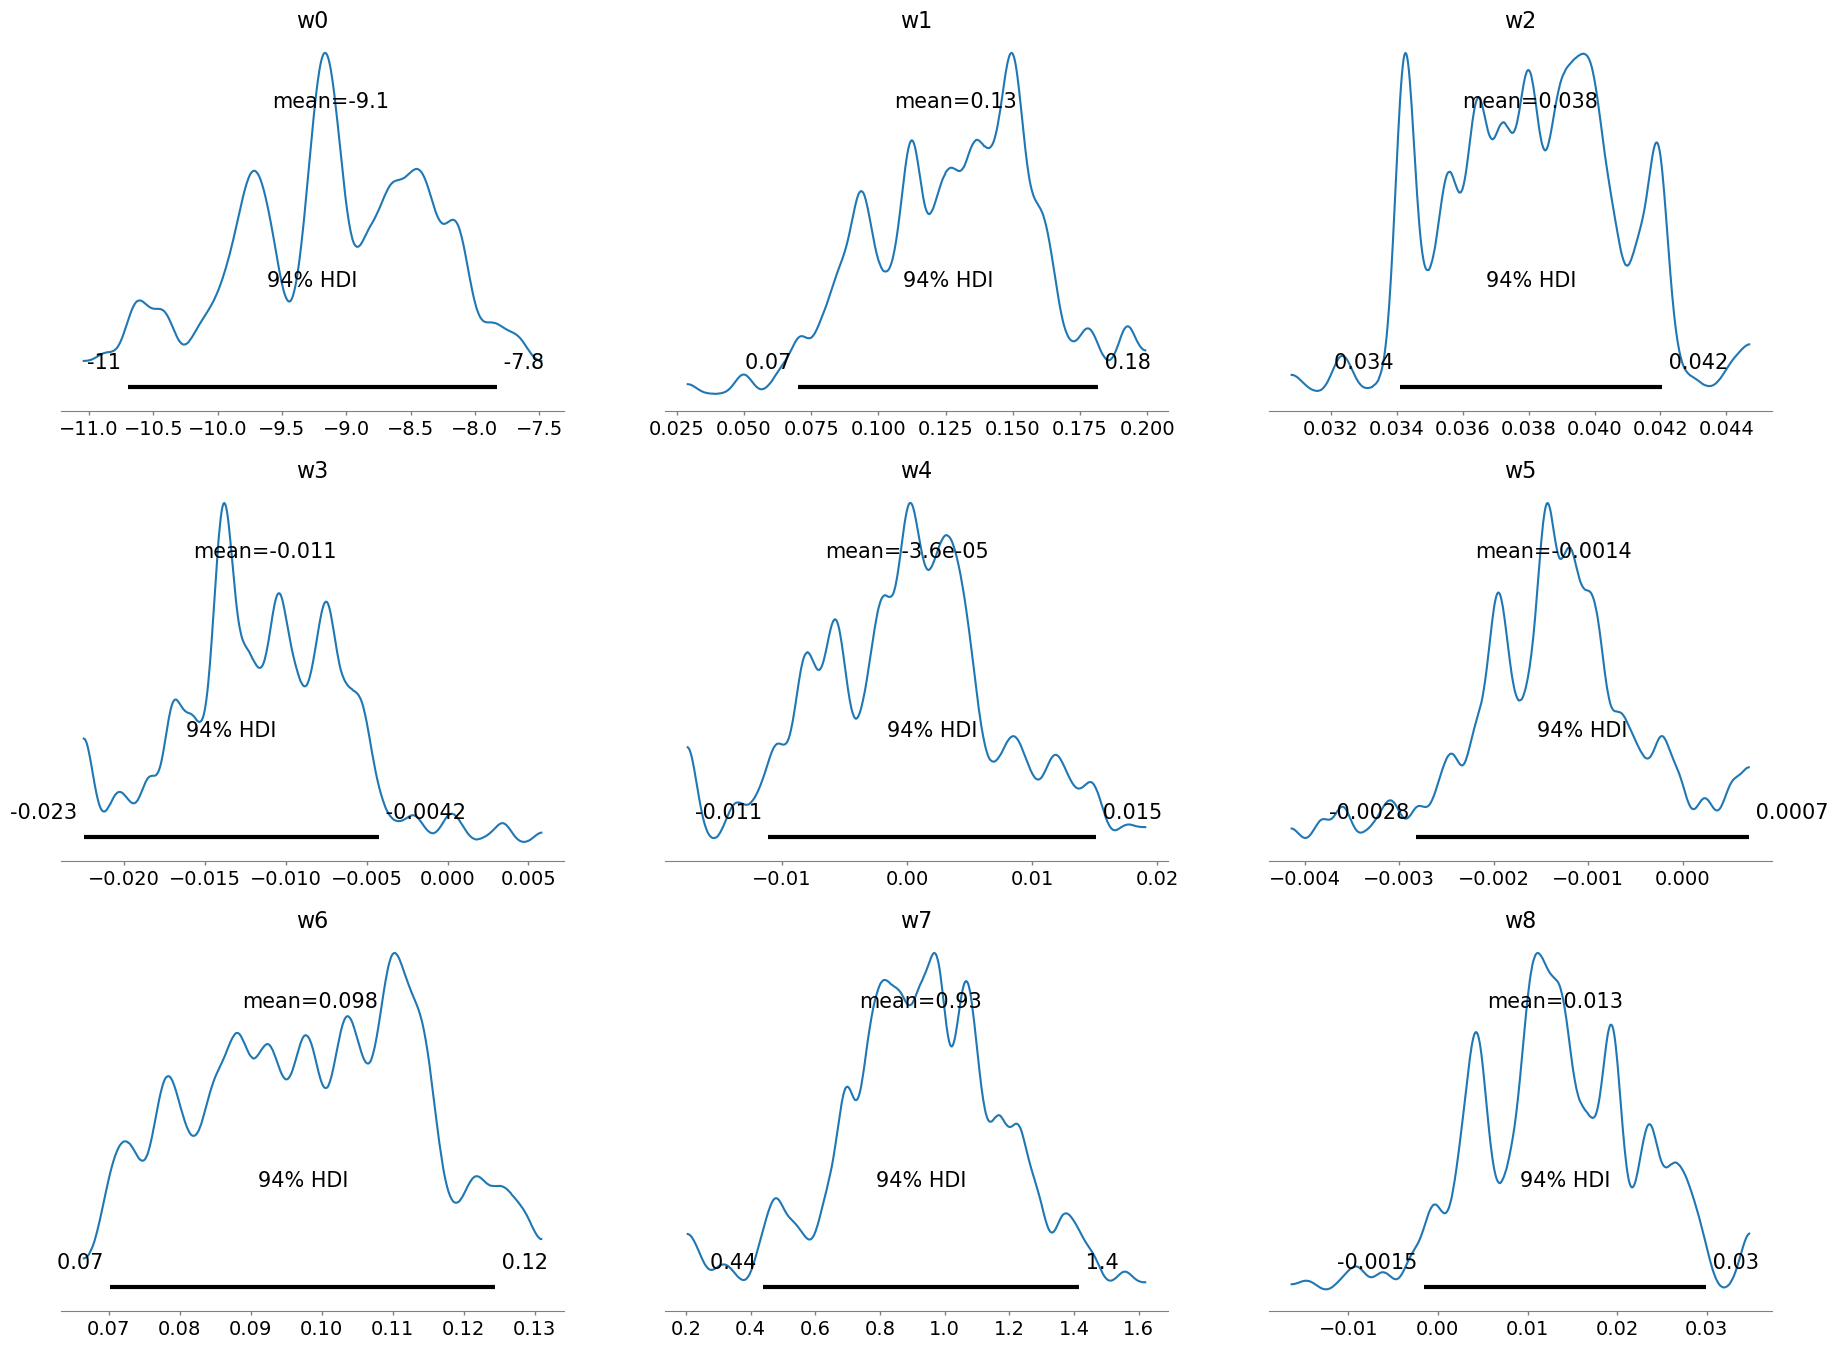

In [31]:
plt.show()